In [305]:
import pandas as pd
import numpy as np
# !pip install pandas-profiling==2.7.1 
from pandas_profiling import ProfileReport

# 1- Importing data and understand it

In [306]:
df = pd.read_csv('dataset.csv')
df.shape

(12330, 18)

In [307]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


In [308]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986002,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# 2- Filling Missing Values

In [309]:
df.Administrative.value_counts()

0.0     5707
1.0     1345
2.0     1105
3.0      909
4.0      758
5.0      567
6.0      429
7.0      336
8.0      286
9.0      223
10.0     152
11.0     102
12.0      85
13.0      56
14.0      44
15.0      37
16.0      24
17.0      16
18.0      11
19.0       6
24.0       4
22.0       4
23.0       3
21.0       2
20.0       2
27.0       1
26.0       1
Name: Administrative, dtype: int64

#Filling missing values with mode all at once
If we have different strategy for any column, fill that before this line

In [310]:
df.apply(lambda x: x.fillna(x.mode()[0], inplace=True))

Administrative             None
Administrative_Duration    None
Informational              None
Informational_Duration     None
ProductRelated             None
ProductRelated_Duration    None
BounceRates                None
ExitRates                  None
PageValues                 None
SpecialDay                 None
Month                      None
OperatingSystems           None
Browser                    None
Region                     None
TrafficType                None
VisitorType                None
Weekend                    None
Revenue                    None
dtype: object

Checking N/A

In [311]:
df.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

# 3- Plot histograms for all features using Profiling

In [312]:
# profile = ProfileReport(df)
# profile.to_file('website_data.html')

# 4- Converting categorical columns to numerical columns using One-Hot-Encoding

In [313]:
df.shape

(12330, 18)

In [314]:
df= pd.get_dummies(df, columns=['OperatingSystems', 'Browser', 'Region',
                            'TrafficType', 'VisitorType', 'Weekend', 'Month',
                            'Revenue'], drop_first=True)

In [315]:
df.shape

(12330, 69)

In [316]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems_2.0', 'OperatingSystems_3.0', 'OperatingSystems_4.0',
       'OperatingSystems_5.0', 'OperatingSystems_6.0', 'OperatingSystems_7.0',
       'OperatingSystems_8.0', 'Browser_2.0', 'Browser_3.0', 'Browser_4.0',
       'Browser_5.0', 'Browser_6.0', 'Browser_7.0', 'Browser_8.0',
       'Browser_9.0', 'Browser_10.0', 'Browser_11.0', 'Browser_12.0',
       'Browser_13.0', 'Region_2.0', 'Region_3.0', 'Region_4.0', 'Region_5.0',
       'Region_6.0', 'Region_7.0', 'Region_8.0', 'Region_9.0',
       'TrafficType_2.0', 'TrafficType_3.0', 'TrafficType_4.0',
       'TrafficType_5.0', 'TrafficType_6.0', 'TrafficType_7.0',
       'TrafficType_8.0', 'TrafficType_9.0', 'TrafficType_10.0',
       'TrafficType_11.0', 'TrafficType_12.0', 'TrafficType_13.0',
       'TrafficTy

# 5- Computing correlations between all features

Note: Correlations matrix before converting categorical data can be found on ProfileReport html file

In [317]:
corr= df.corr()

In [318]:
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems_2.0,OperatingSystems_3.0,OperatingSystems_4.0,OperatingSystems_5.0,OperatingSystems_6.0,OperatingSystems_7.0,OperatingSystems_8.0,Browser_2.0,Browser_3.0,Browser_4.0,Browser_5.0,Browser_6.0,Browser_7.0,Browser_8.0,Browser_9.0,Browser_10.0,Browser_11.0,Browser_12.0,Browser_13.0,Region_2.0,Region_3.0,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,TrafficType_2.0,TrafficType_3.0,TrafficType_4.0,TrafficType_5.0,TrafficType_6.0,TrafficType_7.0,TrafficType_8.0,TrafficType_9.0,TrafficType_10.0,TrafficType_11.0,TrafficType_12.0,TrafficType_13.0,TrafficType_14.0,TrafficType_15.0,TrafficType_16.0,TrafficType_17.0,TrafficType_18.0,TrafficType_19.0,TrafficType_20.0,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Revenue_True
Administrative,1.000000,0.594034,0.371631,0.254644,0.427115,0.369226,-0.221287,-0.295878,0.100988,-0.094643,0.017670,0.001406,-0.007255,-0.010843,-0.008484,0.009192,-0.017875,0.046852,-0.026133,-0.024787,-0.001958,-0.013741,0.009570,-0.029859,-0.000800,-0.000941,-0.010843,-0.003391,-0.010786,0.008454,0.018944,-0.002187,0.007192,-0.021972,0.002646,0.010130,-0.013142,0.114905,-0.070281,0.005251,0.050980,-0.014733,0.011569,0.026497,-0.006033,-0.001131,-0.024053,-0.006239,-0.037191,0.010697,-0.018635,0.003325,-0.006239,-0.001670,-0.009900,-0.010373,-0.020719,-0.021961,0.026591,-0.014456,-0.065616,0.006970,-0.002418,-0.055662,-0.063897,0.053074,0.091703,0.057127,0.136695
Administrative_Duration,0.594034,1.000000,0.295091,0.234998,0.283865,0.347129,-0.142778,-0.192579,0.067886,-0.071768,-0.021736,0.029356,-0.022906,-0.006955,-0.001965,0.010139,-0.008981,0.016246,-0.008453,-0.015985,-0.009266,0.001595,-0.009613,-0.011200,0.015855,-0.000708,-0.006955,0.004079,-0.002029,0.011111,0.003856,0.002740,0.008150,-0.018217,-0.004227,0.009352,-0.007377,0.097693,-0.061002,-0.009475,0.020660,-0.011093,0.002391,0.021574,-0.004071,-0.005993,-0.014129,-0.004095,-0.018688,0.036370,-0.003124,0.019128,-0.004095,-0.001281,-0.008417,-0.004913,-0.008214,-0.022377,0.015968,-0.004953,-0.044076,-0.001098,-0.018629,-0.022058,-0.038659,0.032834,0.051156,0.029206,0.092043
Informational,0.371631,0.295091,1.000000,0.606965,0.367248,0.376690,-0.115082,-0.151991,0.046607,-0.048808,-0.001432,0.019036,-0.022613,-0.005764,-0.002365,0.001397,-0.017899,0.040438,-0.017319,-0.026456,-0.017943,-0.007890,-0.001390,-0.029443,-0.003539,-0.005113,-0.005764,-0.006692,-0.018268,-0.016545,-0.000155,0.002455,-0.007568,0.001355,-0.013210,-0.006756,-0.024474,0.124431,-0.072110,-0.002314,-0.002598,-0.008381,0.001835,-0.000029,-0.007573,0.002829,-0.013697,-0.003539,-0.024656,0.042530,-0.003348,-0.006130,-0.003539,-0.004441,-0.005964,-0.020626,-0.021120,0.055538,0.037708,0.003841,-0.039968,0.003564,0.008652,-0.028344,-0.037273,0.061261,-0.003117,0.008497,0.094501
Informational_Duration,0.254644,0.234998,0.606965,1.000000,0.279988,0.339942,-0.073611,-0.096184,0.030038,-0.031208,0.022959,-0.003071,-0.016275,-0.005052,0.000853,-0.003484,-0.011508,0.035913,-0.009700,-0.016846,-0.012029,0.003794,0.006366,-0.023274,-0.002201,0.000289,-0.005052,-0.005332,-0.016575,0.003348,0.000381,0.004637,-0.003227,-0.008567,-0.017306,-0.001573,-0.021602,0.099806,-0.047705,-0.008388,-0.016179,-0.007220,-0.001343,0.002682,0.000451,-0.006827,-0.014265,-0.002201,-0.019488,0.033380,-0.011396,-0.003812,-0.002201,-0.001575,0.024060,-0.010970,-0.013440,0.044778,0.025262,0.009802,-0.027724,0.015593,-0.015032,-0.012106,-0.031353,0.037291,0.006398,0.001070,0.069849
ProductRelated,0.427115,0.283865,0.367248,0.279988,1.000000,0.843764,-0.202070,-0.278721,0.055766,-0.024860,0.120069,-0.058466,0.020676,-0.009581,-0.008931,-0.006151,-0.030005,0.091606,-0.032538,-0.008104,-0.000662,-0.004907,-0.008217,-0.032471,-0.00434

# Training with 3 different algorithms

Splitting train, test data

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=.2, random_state=42, shuffle=True)

Scaling the data


In [320]:
X_train.max() - X_train.min()

Administrative               27.000
Administrative_Duration    3398.750
Informational                24.000
Informational_Duration     2549.375
ProductRelated              705.000
                             ...   
Month_Mar                     1.000
Month_May                     1.000
Month_Nov                     1.000
Month_Oct                     1.000
Month_Sep                     1.000
Length: 68, dtype: float64

In [321]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [322]:
X_train_scaled.max(axis=0) - X_train_scaled.min(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [323]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled.max(axis=0) - X_test_scaled.min(axis=0)

array([0.88888889, 0.78185158, 0.58333333, 0.88528234, 0.73333333,
       0.46848235, 1.        , 1.        , 0.74851253, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

Checking if dataset is imbalanced. If it is, we have to oversample minor group using SMOTE

In [324]:
from collections import Counter
counter= Counter(y_train)
print(counter, "\t-\tBuy/NoBuy Ratio: %.2f" % (counter[0]/counter[1]))

Counter({0: 8367, 1: 1497}) 	-	Buy/NoBuy Ratio: 5.59


In [325]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [326]:
counter= Counter(y_res)
print(counter, "\t-\tBuy/NoBuy Ratio: %.2f" % (counter[0]/counter[1]))

Counter({0: 8367, 1: 8367}) 	-	Buy/NoBuy Ratio: 1.00


# Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

lr = LogisticRegression(max_iter=20000, C=1)
scores= cross_val_score(lr, X_res, y_res, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.01


In [328]:
lr.fit(X_res, y_res)
preds = lr.predict(X_test_scaled)
preds[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [329]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
# Metrics for all algorithms
alg_metrics= pd.DataFrame([], columns=['Algorithm','AUC','Accuracy', 'Precision', 'Recall', 'F1_Score'])
accuracy= accuracy_score(y_test, preds)
precision= precision_score(y_test, preds)
recall= recall_score(y_test, preds)
f1= f1_score(y_test, preds)

probs = lr.predict_proba(X_test_scaled)
psur = probs[:,1]
auc= roc_auc_score(y_test, psur)

alg_metrics= alg_metrics.append(pd.Series(['Logistic Regression', auc, accuracy, precision, recall, f1], index=alg_metrics.columns), ignore_index=True)

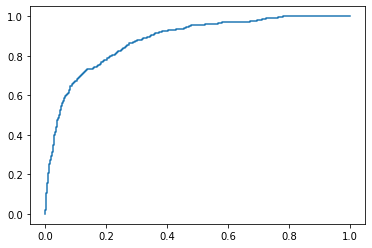

In [330]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
fpr1, tpr1, thresholds1 = roc_curve(y_test, psur)
plt.clf()
plt.plot(fpr1, tpr1)
plt.show()

# K Nearest Neighbors

In [331]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
scores= cross_val_score(knn, X_res, y_res, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 accuracy with a standard deviation of 0.01


In [332]:
knn.fit(X_res,y_res)
preds = knn.predict(X_test_scaled)
preds[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=uint8)

In [333]:
accuracy= accuracy_score(y_test, preds)
precision= precision_score(y_test, preds)
recall= recall_score(y_test, preds)
f1= f1_score(y_test, preds)

probs = knn.predict_proba(X_test_scaled)
psur = probs[:,1]
auc= roc_auc_score(y_test, psur)

alg_metrics= alg_metrics.append(pd.Series(['K Nearest Neighbors', auc, accuracy, precision, recall, f1], index=alg_metrics.columns), ignore_index=True)

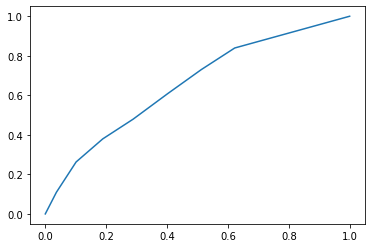

In [334]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, psur)
plt.clf()
plt.plot(fpr2, tpr2)
plt.show()

KNN performance is weaker than Logistic Regression

# Support Vector Machine

In [335]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.0, probability=True)
scores= cross_val_score(clf, X_res, y_res, cv=3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.84 accuracy with a standard deviation of 0.01


In [336]:
clf.fit(X_res,y_res)
preds = clf.predict(X_test_scaled)
preds[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [337]:
accuracy= accuracy_score(y_test, preds)
precision= precision_score(y_test, preds)
recall= recall_score(y_test, preds)
f1= f1_score(y_test, preds)

probs = clf.predict_proba(X_test_scaled)
psur = probs[:,1]
auc= roc_auc_score(y_test, psur)

alg_metrics= alg_metrics.append(pd.Series(['Support Vector Machine', auc, accuracy, precision, recall, f1], index=alg_metrics.columns), ignore_index=True)

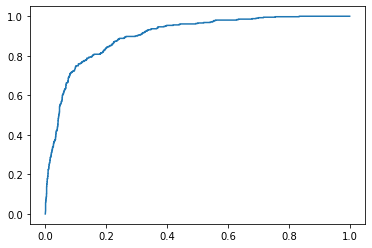

In [338]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, psur)
plt.clf()
plt.plot(fpr3, tpr3)
plt.show()

# 7- Comparing Algorithms

In [339]:
alg_metrics

,Algorithm,AUC,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.880296,0.845093,0.525755,0.720195,0.607803
1,K Nearest Neighbors,0.654173,0.672749,0.249367,0.479319,0.328060
2,Support Vector Machine,0.901246,0.875507,0.606122,0.722628,0.659267


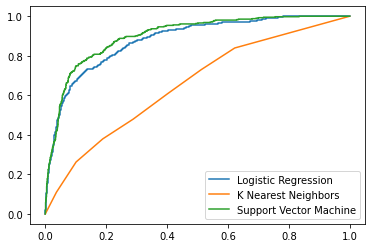

In [340]:
plt.clf()
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='K Nearest Neighbors')
plt.plot(fpr3, tpr3, label='Support Vector Machine')
plt.legend()
plt.show()